## Making Dataset 

Details:
1. this dataset comprises impulse reponses of objects of different physical properties. Excitations are merely delta functions.
2. each sound sample would be 2 seconds long, regardless of decay rates.
3. 100k sound samples are made for each of the three models - 1-d string, 2-d rectangular surface, 3-d box. in total there are 300k samples each of 2 seconds long. Sample rate is 44100 Hz.
4. parameters to learn: $\theta = \{\omega_1, \tau_1, p, D, \alpha\}$
5. sampling space: 5-dimensional space of theta. $\omega \in \{200\pi, 4000\pi \}$, $\tau \in \{0.01,0.3\}$, $p \in \{0.0001,2\}$, $D \in \{0.0001,10\}$, $\alpha \in \{0.001,1\}$

## 2D rectangular surface
1. sample $\theta$: p and D in log space, rest in linear space; since needs higher resolution closer to 0 for p and D. each parameter has 10 samples. 10e5 = 100k
2. record each sample's $\theta$ into pandas dataframe.
3. make dataset train:val:test = 8:1:1

In [3]:
import numpy as np
import pandas
import random
import matplotlib.pyplot as plt

In [2]:
# sample theta - these are only regularly spaced intervals, should i further pick random numbers within these spaces?

omega = np.linspace(200*np.pi,4000*np.pi,11)
tau = np.linspace(0.01,0.3,11)
p = np.logspace(np.log10(0.0001),np.log10(2),11)
D = np.logspace(np.log10(0.0001),np.log10(10),11)
alpha = np.linspace(0.001,1,11)

In [3]:
print(omega,omega[2],omega[-3])

[  628.31853072  1822.12373908  3015.92894745  4209.73415581
  5403.53936417  6597.34457254  7791.1497809   8984.95498927
 10178.76019763 11372.565406   12566.37061436] 3015.928947446201 10178.760197630929


In [69]:
#validation set should be in the middle of sampling space. or centered around in a few scattered spots.
set2d = {}
count_val = 0
count_test = 0
count_train = 0
count = 0

range_om = [omega[2],omega[-3]]
range_t = [tau[2],tau[-3]]
range_p = [p[2],p[-3]]
range_D = [D[2],D[-3]]
range_a = [alpha[2],alpha[-3]]




random.seed(960602)  

set2d['omega'] = {}
set2d['tau'] = {}
set2d['p'] = {}
set2d['D'] = {}
set2d['alpha'] = {}
set2d['set'] = {}

for o in range(10):
    for t in range(10):
        for pp in range(10):
            for d in range(10):
                for a in range(10):
                    #val[countval] = {}
                    om = omega[o] + random.random() * (omega[o+1] - omega[o])
                    ta = tau[t] + random.random() * (tau[t+1] - tau[t])
                    ppp = p[pp] + random.random() * (p[pp+1] - p[pp])
                    DD = D[d] + random.random() * (D[d+1] - D[d])
                    A = alpha[a] + random.random() * (alpha[a+1] - alpha[a])
                    set2d['omega'][count] = om
                    set2d['tau'][count] = ta
                    set2d['p'][count]  = ppp
                    set2d['D'][count] = DD
                    set2d['alpha'][count] = A
                    if om < range_om[-1] and om > range_om[0]:
                        if ta < range_t[-1] and ta > range_t[0]:
                            if ppp < range_p[-1] and ppp > range_p[0]:
                                 if DD < range_D[-1] and DD > range_D[0]:
                                         if A < range_a[-1] and A > range_a[0]:
                                                set2d['set'][count] = 'val'
                                                count_val += 1
                    if count not in set2d['set'].keys():
                        set2d['set'][count] = 'train'
                        count_train += 1
                    count += 1
                

In [70]:
print(count_train,count_val,count,10**5)

92224 7776 100000 100000


In [71]:
#randomly pick 10k test set from train set
train_idx = []
test_idx = []
val_idx = []
for i in set2d['set'].keys():
    if set2d['set'][i] == 'train':
        train_idx.append(i)
    elif set2d['set'][i] == 'test':
        test_idx.append(i)
    elif set2d['set'][i] == 'val':
        val_idx.append(i)


In [73]:
random.seed(960602)    
random.shuffle(train_idx)

for idx in train_idx[:10000]:
    set2d['set'][idx] = 'test'
    test_idx.append(idx)
    
for i in test_idx:
    train_idx.remove(i)

In [74]:
#len(test_idx)
print(len(train_idx),len(test_idx),len(val_idx))

82224 10000 7776


In [75]:
count_test = 0
for i in set2d['set'].keys():
    if set2d['set'][i] == 'test':
        count_test += 1
print(count_test)

10000


In [76]:
set2d_df = pandas.DataFrame.from_dict(set2d)
#print(set2d_df)

In [77]:
#save param set to file
set2d_df.to_csv(r'./diffshapes_param.csv')

In [78]:
#data frame for each set, #train = 79669, #test = 10000, #val = 10331
set2d_val_df = set2d_df.loc[val_idx, :] 
set2d_test_df = set2d_df.loc[test_idx, :] 
set2d_train_df = set2d_df.loc[train_idx, :] 

In [79]:
val_D = set2d_val_df['D']
val_a = set2d_val_df['alpha']
val_o = set2d_val_df['omega']
val_p = set2d_val_df['p']
val_t = set2d_val_df['tau']

Text(0.5, 1.0, 'Alpha and D space')

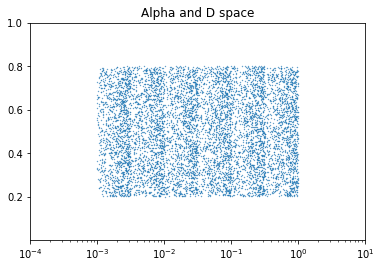

In [80]:
plt.scatter(val_D,val_a,s = 0.1)
plt.xscale('log')
plt.xlim([D[0],D[-1]])
plt.ylim([alpha[0],alpha[-1]])
plt.title('Alpha and D space')

Text(0.5, 1.0, 'Omega and p space')

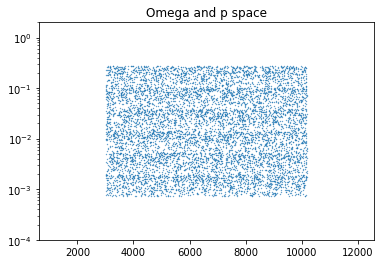

In [14]:
plt.scatter(val_o,val_p,s = 0.1)
plt.yscale('log')
plt.xlim([omega[0],omega[-1]])
plt.ylim([p[0],p[-1]])

plt.title('Omega and p space')

Text(0.5, 1.0, 'tau and p space')

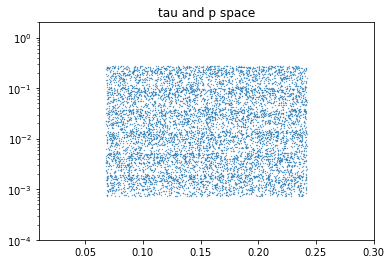

In [15]:
plt.scatter(val_t,val_p,s = 0.1)

plt.yscale('log')
plt.xlim([tau[0],tau[-1]])
plt.ylim([p[0],p[-1]])

plt.title('tau and p space')

validation set: 6^5 space carved in the middle of sampling space


training set + test set: rest of the space surrounding it.  

In [277]:
val_space = 0.1**(1/5)*10 # this would be the diameter of 5 dimensional space you want to carve out for validation set.
print(val_space)

6.3095734448019325


In [157]:
print(set2d_train_df.shape,set2d_test_df.shape,set2d_val_df.shape)

(82224, 6) (10000, 6) (7776, 6)


In [158]:
set2d_train_df.to_csv(r'./train_param.csv')
set2d_test_df.to_csv(r'./test_param.csv')
set2d_val_df.to_csv(r'./val_param.csv')

## Datasets

train sets:

1. varying shapes, all excited at the center
2. varying shapes, excited at different spots

test sets:

1. test on different shapes, excited at other spots
2. test on different shapes, excited at the center
3. test on different shapes, excited differently??



In [89]:
set2d.keys()

dict_keys(['omega', 'tau', 'p', 'D', 'alpha', 'set'])

In [97]:
omega = list(set2d['omega'].values())
tau = list(set2d['tau'].values())
p = list(set2d['p'].values())
D = list(set2d['D'].values())
alpha = list(set2d['alpha'].values())

normalization of ground truth physical parameters:

make them into 0 mean 1 std vs. confine them into -1/2 to 1/2 range

In [98]:
def normalize(a_list):
    """
    This function normalizes an array to 0 mean 1 std
    """
    a_array = np.array(a_list)
    mean = np.mean(a_array)
    std = np.std(a_array)
    a_normalized = (a_array - mean)/std
    return a_normalized, mean, std

def de_normalize(b_list,mean,std):
    """
    This function reconstruct an array from 0 mean 1 std
    """
    recovered = std * np.array(b_list) + mean
    return recovered

In [107]:
omega_normalized,omega_m, omega_s = normalize(omega)
omega_re = de_normalize(omega_normalized,omega_m,omega_s)
print(np.min(omega_normalized),np.max(omega_normalized))

-1.732447332609351 1.7322770090625184


In [109]:
tau_normalized,tau_m, tau_s = normalize(tau)
tau_re = de_normalize(tau_normalized,tau_m,tau_s)
print(np.min(tau_normalized),np.max(tau_normalized))

-1.7320955093553192 1.7325568054990272


In [117]:
def normalize2(a_list):
    """
    This function confines an array to -1/2 to 1/2
    """
    a_array = np.array(a_list)
    a_min = np.min(a_array)
    a_range = np.max(a_array) - a_min
    a_normalized = (a_array - a_min) / a_range - 1/2
    return a_normalized, a_range, a_min

def de_normalize2(b_list,b_range,b_min):
    """
    This function reconstruct an array from 0 mean 1 std
    """
    recovered = (np.array(b_list) + 1/2) * b_range + b_min
    return recovered


In [125]:
omega_normalized,omega_r, omega_m = normalize2(omega)
omega_re = de_normalize2(omega_normalized,omega_r,omega_m)
print(np.min(omega_normalized),np.max(omega_normalized),np.sum(omega_re-omega))

-0.5 0.5 -2.151068656530697e-09


## make the dataset

should make the dataset on hpc

In [143]:
set2d_train_df.index

Int64Index([24936,   519, 23240,  2646,  6160,  2344, 67072, 15668, 93360,
            37020,
            ...
             1548, 19487, 52995, 66919, 69846, 65368, 99480, 12084, 97505,
            25386],
           dtype='int64', length=82224)

In [1]:
import ftm
import soundfile as sf
from kymatio import Scattering1D

In [4]:
#load csv file as pandas dataframe
df_train = pandas.read_csv("train_param.csv") 
df_train.values.shape

(82224, 7)

In [5]:
df_train.values[3,0]

2646

In [6]:
N = 2**16 #length of audio signal
J = 8

# scattering order one
def getsc1(y, J):
    """
    this function outputs scattering transform of a time-domain signal.
    """
    N = len(y)
    scattering = Scattering1D(J = J,shape=(N,), max_order=1)
    Sy = scattering(y)
    return Sy

In [7]:
mode = 10
sr = 44100
params = df_train.values
n_samp,n_param = params.shape
for i in range(n_samp):
    omega,tau,p,D,alpha = params[i,1:-1]
    print(omega,tau,p,D,alpha)
    y = ftm.getsounds_imp(mode,mode,omega,tau,p,D,alpha,sr)
    y = y/ max(y)
    filename = "/scratch/hh2263/drum_data/train/"+str(params[i,0])+"_sound.wav"
    print(filename)
    #sf.write(filename, y, sr)
    break

3641.267682215784 0.14912260113032105 0.9748392162093932 0.008955332878189611 0.6462749409737613
/scratch/hh2263/drum_data/train/24936_sound.wav


In [9]:
len(y)-2**16

0